## Train and explain a classifer

Note that this is a small sample of the whole data for demonstration purpose.

In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pickle

from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/Ziqi-Li/geoshapley/refs/heads/main/data/seattle_sample_1k.csv")

In [3]:
data = gpd.GeoDataFrame(
    data, crs="EPSG:32610", geometry=gpd.points_from_xy(x=data.UTM_X, y=data.UTM_Y))

In [4]:
data["price_above_0_5M"] = 10**data.log_price >= (10**5)*5

In [5]:
data["price_above_0_5M"].value_counts()

price_above_0_5M
False    623
True     377
Name: count, dtype: int64

In [6]:
y = data.price_above_0_5M

X_coords = data[['bathrooms', 'sqft_living', 'sqft_lot', 'grade', 'condition',
                 'waterfront', 'view', 'age','UTM_X', 'UTM_Y']]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_coords, y, random_state=1)

## Model training by AutoML

In [8]:
from flaml import AutoML

settings = {
    "time_budget": 20,  # total running time in seconds
    "metric": 'accuracy',  # primary metrics for classification
    "estimator_list": 'auto',  # list of ML learners; 'auto' means try all
    "task": 'classification',  # task type, can also be regression   
    "eval_method": 'cv', #enable cross-validation
    "n_splits": 5, #5-fold cross validation
    "verbose": 3
}

automl = AutoML()
automl.fit(X_train, y_train,  **settings)

[flaml.automl.logger: 07-23 11:04:50] {1728} INFO - task = classification
[flaml.automl.logger: 07-23 11:04:50] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 07-23 11:04:50] {1838} INFO - Minimizing error metric: 1-accuracy
[flaml.automl.logger: 07-23 11:04:50] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd', 'catboost', 'lrl1']
[flaml.automl.logger: 07-23 11:04:50] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 07-23 11:04:50] {2393} INFO - Estimated sufficient time budget=326s. Estimated necessary time budget=8s.
[flaml.automl.logger: 07-23 11:04:50] {2442} INFO -  at 0.1s,	estimator lgbm's best error=0.2173,	best estimator lgbm's best error=0.2173
[flaml.automl.logger: 07-23 11:04:50] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 07-23 11:04:50] {2442} INFO -  at 0.1s,	estimator lgbm's best error=0.2173,	best estimator lgbm's best error=0.2173
[flaml.automl.log

[flaml.automl.logger: 07-23 11:04:52] {2258} INFO - iteration 34, current learner sgd
[flaml.automl.logger: 07-23 11:04:52] {2442} INFO -  at 2.2s,	estimator sgd's best error=0.3773,	best estimator lgbm's best error=0.1200
[flaml.automl.logger: 07-23 11:04:52] {2258} INFO - iteration 35, current learner lgbm
[flaml.automl.logger: 07-23 11:04:52] {2442} INFO -  at 2.4s,	estimator lgbm's best error=0.1200,	best estimator lgbm's best error=0.1200
[flaml.automl.logger: 07-23 11:04:52] {2258} INFO - iteration 36, current learner xgboost
[flaml.automl.logger: 07-23 11:04:52] {2442} INFO -  at 2.4s,	estimator xgboost's best error=0.1293,	best estimator lgbm's best error=0.1200
[flaml.automl.logger: 07-23 11:04:52] {2258} INFO - iteration 37, current learner sgd
[flaml.automl.logger: 07-23 11:04:52] {2442} INFO -  at 2.4s,	estimator sgd's best error=0.3773,	best estimator lgbm's best error=0.1200
[flaml.automl.logger: 07-23 11:04:52] {2258} INFO - iteration 38, current learner xgboost
[flaml.a

[flaml.automl.logger: 07-23 11:04:55] {2442} INFO -  at 5.3s,	estimator sgd's best error=0.3773,	best estimator lgbm's best error=0.1173
[flaml.automl.logger: 07-23 11:04:55] {2258} INFO - iteration 71, current learner catboost
[flaml.automl.logger: 07-23 11:04:55] {2442} INFO -  at 5.7s,	estimator catboost's best error=0.1120,	best estimator catboost's best error=0.1120
[flaml.automl.logger: 07-23 11:04:55] {2258} INFO - iteration 72, current learner catboost
[flaml.automl.logger: 07-23 11:04:56] {2442} INFO -  at 6.1s,	estimator catboost's best error=0.1093,	best estimator catboost's best error=0.1093
[flaml.automl.logger: 07-23 11:04:56] {2258} INFO - iteration 73, current learner sgd
[flaml.automl.logger: 07-23 11:04:56] {2442} INFO -  at 6.1s,	estimator sgd's best error=0.3773,	best estimator catboost's best error=0.1093
[flaml.automl.logger: 07-23 11:04:56] {2258} INFO - iteration 74, current learner catboost
[flaml.automl.logger: 07-23 11:04:56] {2442} INFO -  at 6.5s,	estimator

[flaml.automl.logger: 07-23 11:05:03] {2258} INFO - iteration 106, current learner sgd
[flaml.automl.logger: 07-23 11:05:03] {2442} INFO -  at 13.2s,	estimator sgd's best error=0.3773,	best estimator catboost's best error=0.1053
[flaml.automl.logger: 07-23 11:05:03] {2258} INFO - iteration 107, current learner sgd
[flaml.automl.logger: 07-23 11:05:03] {2442} INFO -  at 13.2s,	estimator sgd's best error=0.3773,	best estimator catboost's best error=0.1053
[flaml.automl.logger: 07-23 11:05:03] {2258} INFO - iteration 108, current learner catboost
[flaml.automl.logger: 07-23 11:05:04] {2442} INFO -  at 14.1s,	estimator catboost's best error=0.1053,	best estimator catboost's best error=0.1053
[flaml.automl.logger: 07-23 11:05:04] {2258} INFO - iteration 109, current learner sgd
[flaml.automl.logger: 07-23 11:05:04] {2442} INFO -  at 14.1s,	estimator sgd's best error=0.3773,	best estimator catboost's best error=0.1053
[flaml.automl.logger: 07-23 11:05:04] {2258} INFO - iteration 110, current

[flaml.automl.logger: 07-23 11:05:09] {2442} INFO -  at 19.5s,	estimator xgboost's best error=0.1147,	best estimator catboost's best error=0.1053
[flaml.automl.logger: 07-23 11:05:09] {2258} INFO - iteration 142, current learner sgd
[flaml.automl.logger: 07-23 11:05:09] {2442} INFO -  at 19.5s,	estimator sgd's best error=0.3773,	best estimator catboost's best error=0.1053
[flaml.automl.logger: 07-23 11:05:09] {2258} INFO - iteration 143, current learner sgd
[flaml.automl.logger: 07-23 11:05:09] {2442} INFO -  at 19.5s,	estimator sgd's best error=0.3773,	best estimator catboost's best error=0.1053
[flaml.automl.logger: 07-23 11:05:09] {2258} INFO - iteration 144, current learner sgd
[flaml.automl.logger: 07-23 11:05:09] {2442} INFO -  at 19.5s,	estimator sgd's best error=0.3773,	best estimator catboost's best error=0.1053
[flaml.automl.logger: 07-23 11:05:09] {2258} INFO - iteration 145, current learner sgd
[flaml.automl.logger: 07-23 11:05:09] {2442} INFO -  at 19.6s,	estimator sgd's b

In [9]:
auto_pred = automl.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, auto_pred)

0.876

In [10]:
automl.model.estimator

In [11]:
from geoshapley import GeoShapleyExplainer

In [12]:
import shap

#It is suggested to use a small representative samples as background, 
#for small dataset, you can use all the data.

#This can be randomly chosen, or as shown here, using k-means

background_X = shap.kmeans(X_coords,k=10).data

### Important: Define a wrapper prediction function for getting predicted probabaility

In [13]:
def predict_fn_proba(X):
    return automl.predict_proba(X)[:,1]

In [14]:
%%time
automl_explainer = GeoShapleyExplainer(predict_fn_proba, background_X)

rslt = automl_explainer.explain(X_coords, n_jobs=-1)

  0%|          | 0/1000 [00:00<?, ?it/s]

CPU times: user 1.41 s, sys: 1.05 s, total: 2.46 s
Wall time: 5 s


In [15]:
rslt.check_additivity()

Components add up to model prediction:  True


### Geoshapley values now refer to probability of True (house price > =0.5 Million)

(-0.4, 0.4)

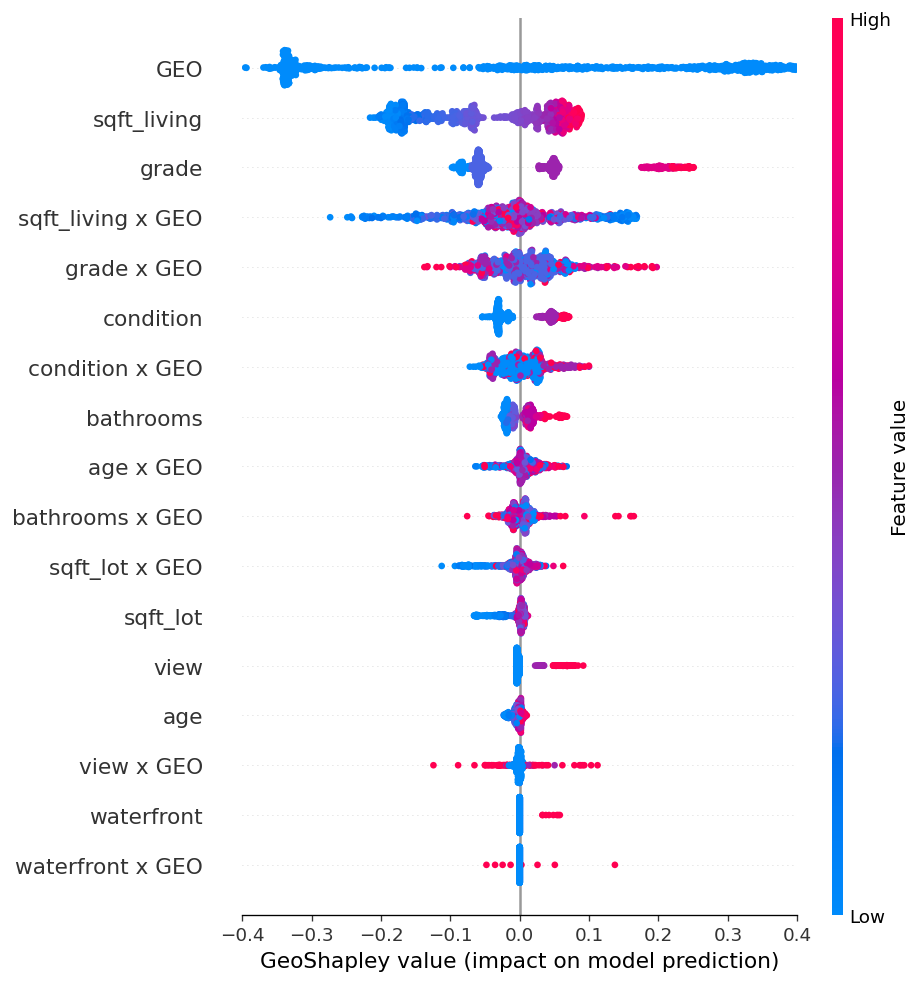

In [16]:
rslt.summary_plot(dpi=120)
plt.xlim(-0.4,0.4)# changing the x limit of the values

In [17]:
rslt.summary_statistics()

,min,25%,50%,75%,max,mean,std,abs. mean
GEO,-5.002288e-01,-3.067746e-01,4.750492e-02,3.059852e-01,0.460740,0.031650,0.274817,0.244895
sqft_living,-2.156912e-01,-1.551572e-01,-1.863738e-02,5.203037e-02,0.089196,-0.044635,0.099278,0.091704
grade,-9.762291e-02,-6.118407e-02,-5.556401e-02,4.932306e-02,0.250598,0.007292,0.100092,0.082303
sqft_living x GEO,-2.731899e-01,-4.605647e-02,-8.455256e-03,2.598823e-02,0.168856,-0.009418,0.079807,0.058813
grade x GEO,-1.373836e-01,-2.902813e-02,5.684766e-03,3.580936e-02,0.197476,0.005590,0.048642,0.038127
condition,-5.399295e-02,-3.088777e-02,-2.360177e-02,4.504370e-02,0.071364,0.001009,0.038370,0.036145
condition x GEO,-7.187990e-02,-2.068846e-02,-7.733921e-04,2.259554e-02,0.099918,0.000846,0.029579,0.023897
bathrooms,-2.703423e-02,-1.748071e-02,-7.721428e-03,1.413093e-02,0.068263,0.000348,0.019859,0.017017
age x GEO,-6.395634e-02,-1.146788e-03,4.884032e-03,1.560117e-02,0.067717,0.005840,0.018881,0.014212
bathrooms x GEO,-7.570798e-02,-8.858121e-03,2.612065e-03,9.722329e-03,0.164500,0.002029,0.018156,0.012151


In [18]:
rslt.check_additivity()

Components add up to model prediction:  True


### Location invariant primary effects

100% (10 of 10) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (10 of 10) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (10 of 10) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (10 of 10) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (10 of 10) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (10 of 10) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (10 of 10) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (10 of 10) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


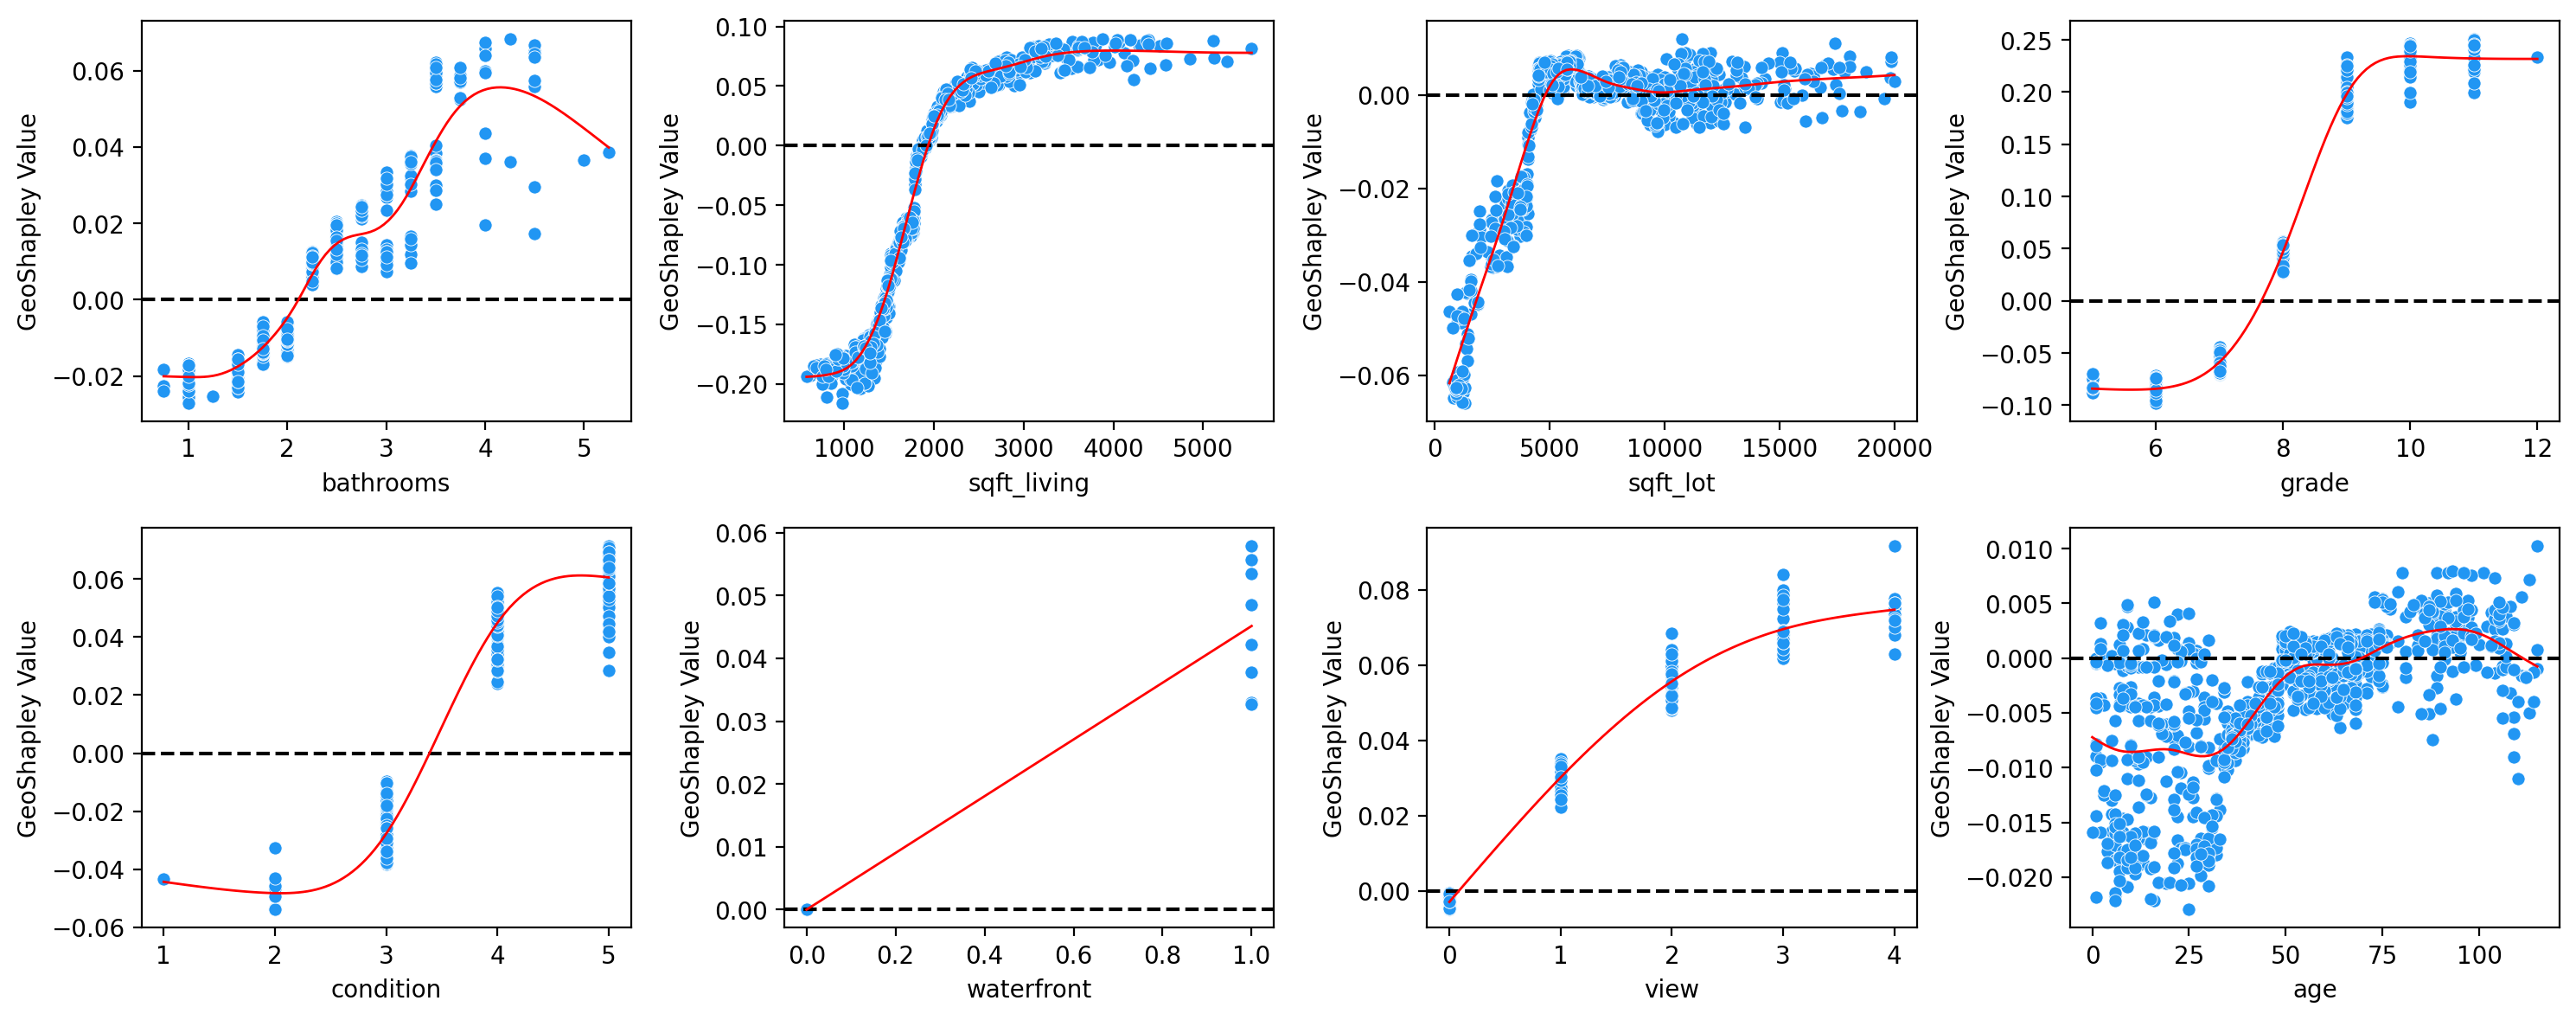

In [19]:
rslt.partial_dependence_plots(figsize=(15,6),max_cols=4,gam_curve=True,s=30)

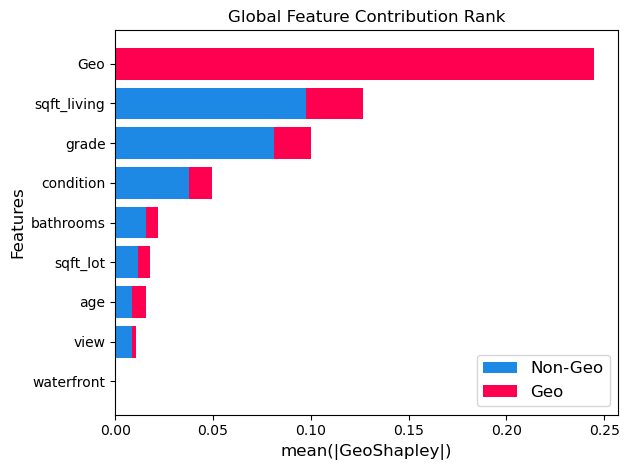

In [20]:
rslt.contribution_bar_plot(dpi=100)